# Term Project Proposal

### Names: Alexander Romero-Barrionuevo
### Names: Dylan Lam

### EID's: ANR3784
### EID's: DXL85

In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [62]:
# import data
df = pd.read_csv('train.csv')

----

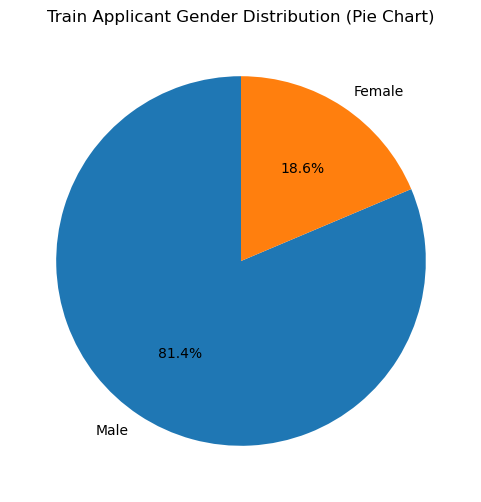

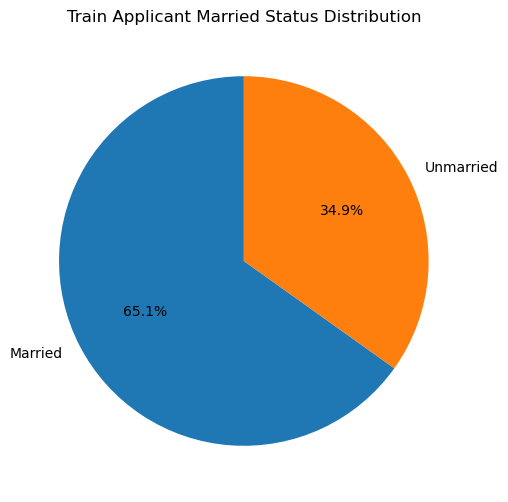

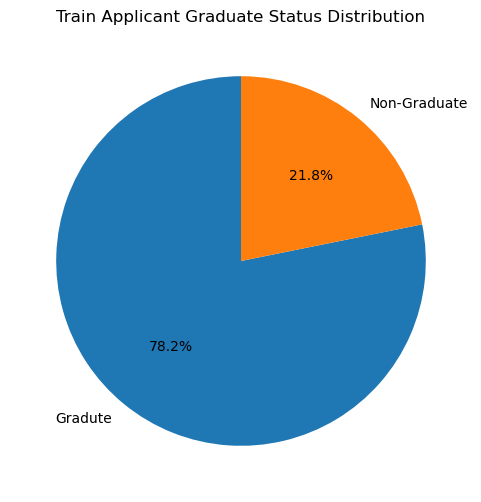

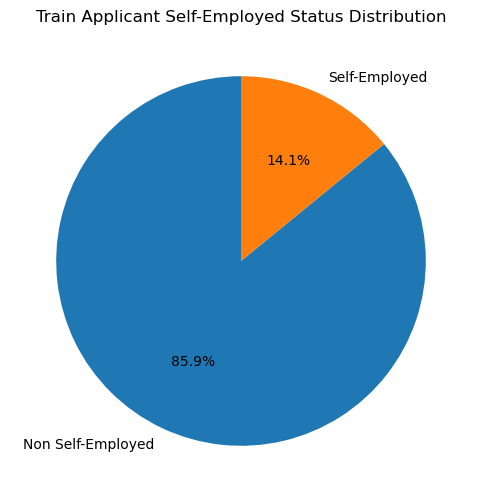

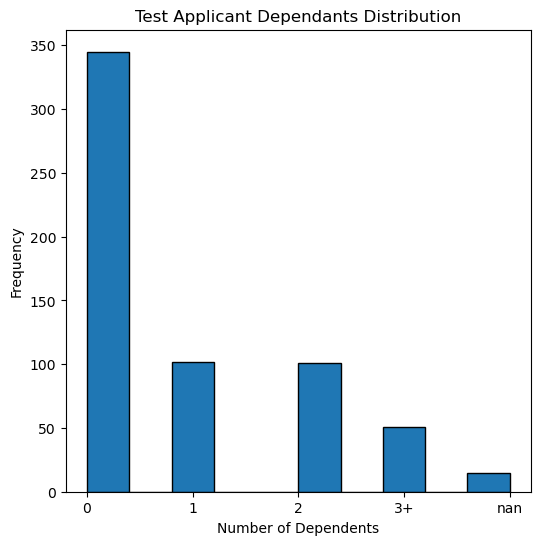

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


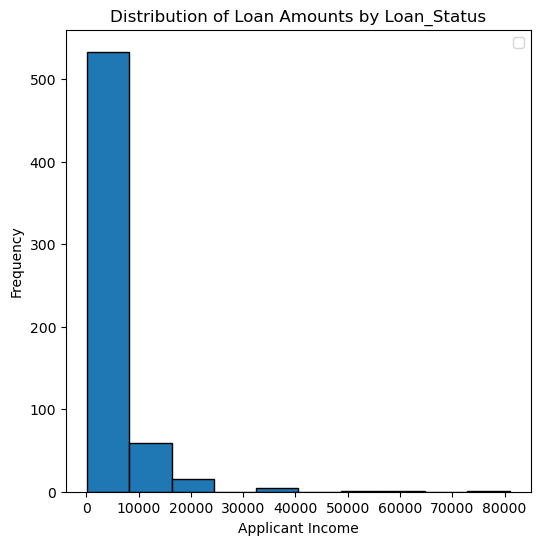

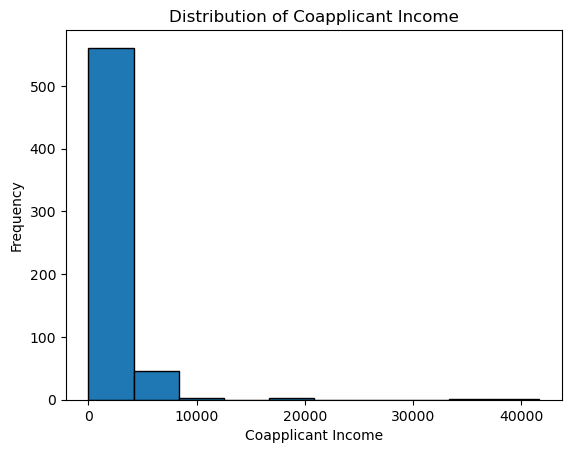

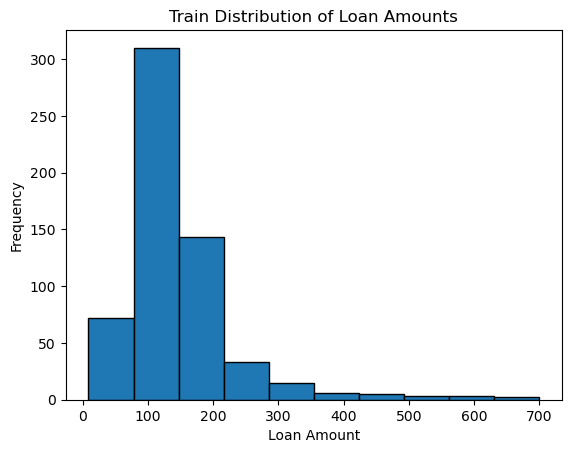

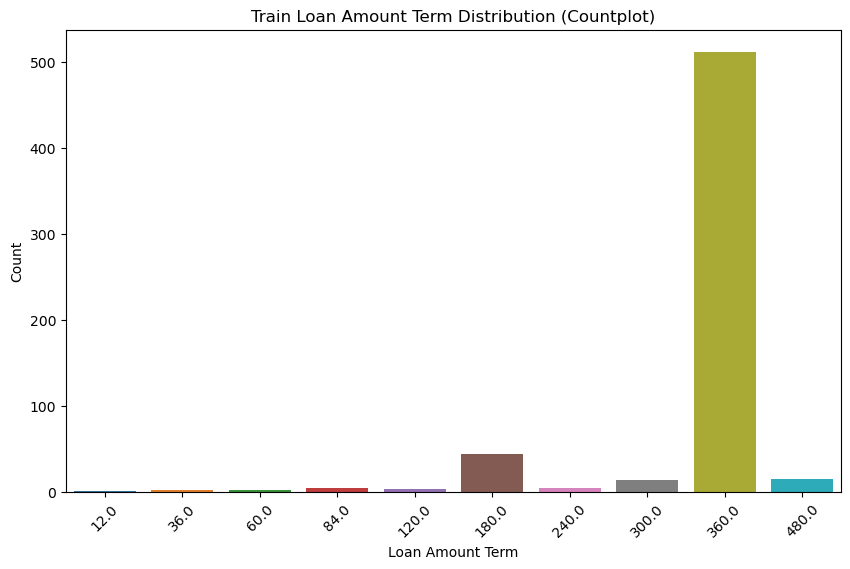

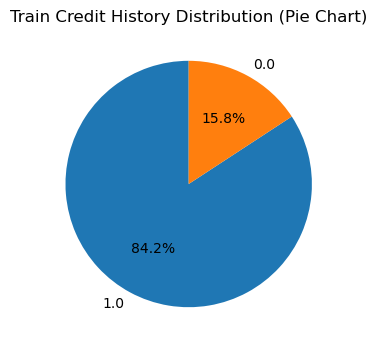

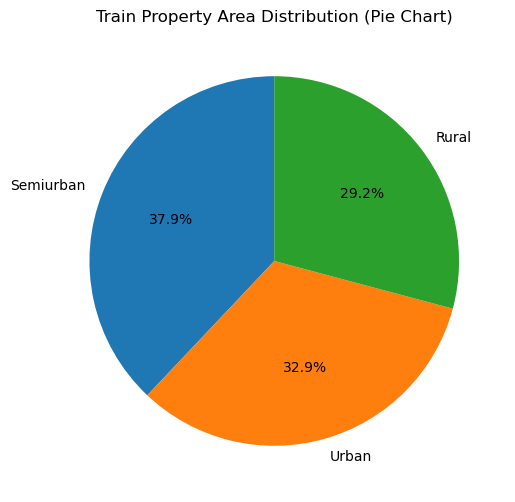

In [63]:
# Display the current train data
# Display test data gender distrubution: Pie Chart
test_gender_data = df['Gender']
test_gender_counts = test_gender_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_gender_counts,
        labels=['Male','Female'],
        autopct='%1.1f%%',
        startangle=90)
test_gender_fig = plt.title('Train Applicant Gender Distribution (Pie Chart)')
plt.show()

# Display test data married status distrubution: Pie Chart
test_married_data = df['Married']
test_married_counts = test_married_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_married_counts,
        labels=['Married','Unmarried'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Married Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_grad_data = df['Education']
test_grad_counts = test_grad_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_grad_counts,
        labels=['Gradute','Non-Graduate'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Graduate Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_selfEmploy_data = df['Self_Employed']
test_selfEmploy_counts = test_selfEmploy_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_selfEmploy_counts,
        labels=['Non Self-Employed','Self-Employed'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Self-Employed Status Distribution')
plt.show()

# Display number of dependents distrubution: Bar Chart
plt.figure(figsize=(6, 6))
plt.hist(df['Dependents'].astype(str), bins=10, edgecolor='black')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.title('Test Applicant Dependants Distribution')
plt.show()

# Creatiing a Histogram of Distribution of Applicant Income
plt.figure(figsize=(6, 6))
applicant_income = df['ApplicantIncome']
plt.hist(applicant_income, bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
# plt.show()unt')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts by Loan_Status')
plt.legend()  # Show the legend to distinguish the two histograms
plt.show()


# Creatiing a Histogram of Distribution of Coapplicant Income
coapplicant_income = df['CoapplicantIncome']
plt.hist(coapplicant_income, bins=10, edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()


# Creatiing a Histogram of Distribution of Loan Amounts
loan_amount = df['LoanAmount']
plt.hist(loan_amount, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Train Distribution of Loan Amounts')
plt.show()


#Creating a Countplot of Distribution of Loan Amount Terms
loan_amount_term = df['Loan_Amount_Term']
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_amount_term)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Train Loan Amount Term Distribution (Countplot)')
plt.xticks(rotation=45)
plt.show()


# Creating a Piechart of Distribution of Loan Amount Terms
credit_history = df['Credit_History']
credit_history_counts = credit_history.value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Credit History Distribution (Pie Chart)')
plt.show()



# Creatiing a Piechart of Distribution of Property Areas
property_area = df['Property_Area']
property_area_counts = property_area.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Property Area Distribution (Pie Chart)')
plt.show()

### Examine and Clean the Dataset

In [64]:
# data shapes
print('dataset shape', df.shape)

dataset shape (614, 13)


In [65]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
# quick look at the datasets
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [68]:
# examine total sum of null values per collumn
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
# find total sum of duplicates in the dataset
print('Total sum of duplicates in the dataset:', df.duplicated().sum())

Total sum of duplicates in the dataset: 0


In [70]:
# remove Loan_ID from the dataframe
df = df.drop(columns=['Loan_ID'], axis = 0)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
# function to replace null values of categorical columns with mode
def replace_null_with_mode(df, categorical_columns):
    for col in categorical_columns:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# function to replace null values of numerical columns with mean
def replace_null_with_mean(df, numerical_columns):
    for col in numerical_columns:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)


# replace null values with respective modes or means
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
replace_null_with_mode(df, categorical_columns)
replace_null_with_mean(df, numerical_columns)

In [72]:
# verify null values have been replaced
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

----

### Feature Engineering

In [73]:
# Create categorical and numerical columns to train model
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ]

In [74]:
# establish new dataframe with target and non-target collumns
target = df['Loan_Status']
train_df = df.drop(['Loan_Status'], axis=1)

In [75]:
# Encode categorical columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(train_df[categorical_columns])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
encoded_train_df = pd.concat([train_df[numerical_columns], encoded_df], axis=1)

In [76]:
encoded_train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_0.8421985815602837,Credit_History_1.0
0,5849,0.0,146.412162,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4583,1508.0,128.000000,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3000,0.0,66.000000,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583,2358.0,120.000000,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000,0.0,141.000000,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
610,4106,0.0,40.000000,180.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
611,8072,240.0,253.000000,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
612,7583,0.0,187.000000,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


----

### **Data model**

In [77]:
# Split the data for training and testing
X = encoded_train_df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression


# Create model and fit it
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# Model predictions
predictions = model.predict(X_test)

In [79]:
# Evaluate model performance
report = classification_report(y_test, predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.42      0.55        43
           Y       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



### **Improving Model Performance**

In [80]:
# Import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Preprocess numerical features
numerical_scaler = StandardScaler()  # Standardize numerical features
scaled_numerical = numerical_scaler.fit_transform(train_df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine processed features
preprocessed_features = pd.concat([encoded_train_df, scaled_numerical_df], axis=1)

# Define Stratified KFold for imbalanced class handling (optional)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified for imbalanced classes

# Define hyperparameter grid for Random Forest (optional)
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],  # List of values to explore
}



# Loop through Random Forest model with cross-validation
print("\nEvaluating Model: Random Forest")
for train_index, test_index in skf.split(preprocessed_features, target):
    X_train, X_test = preprocessed_features.iloc[train_index], preprocessed_features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Hyperparameter tuning with RandomizedSearchCV
    rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_iter=50, scoring='f1_macro')
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_

    # Make predictions and evaluate model performance
    predictions = best_model.predict(X_test)
    report = classification_report(y_test, predictions)
    print(f"\nFold Report:\n{report}")



Evaluating Model: Random Forest


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fold Report:
              precision    recall  f1-score   support

           N       0.94      0.45      0.61        38
           Y       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fold Report:
              precision    recall  f1-score   support

           N       0.90      0.47      0.62        38
           Y       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fold Report:
              precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fold Report:
              precision    recall  f1-score   support

           N       0.82      0.36      0.50        39
           Y       0.76      0.96      0.85        84

    accuracy                           0.77       123
   macro avg       0.79      0.66      0.68       123
weighted avg       0.78      0.77      0.74       123



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fold Report:
              precision    recall  f1-score   support

           N       0.90      0.47      0.62        38
           Y       0.80      0.98      0.88        84

    accuracy                           0.82       122
   macro avg       0.85      0.72      0.75       122
weighted avg       0.83      0.82      0.80       122



In [115]:
print(best_model)

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=42)


## Analysis of Random Forest Model Performance

This analysis evaluates a Random Forest model using cross-validation.

**Overall Accuracy:**

* The Random Forest model achieved an average accuracy of around 81% across all folds (ranges from 77% to 82%), which is roughly a 5% improvement from the original model.

**Class Imbalance:**

* The classification report shows a significant imbalance in the dataset. The "N" class (likely representing loan rejections) has much lower recall (around 40%) compared to the "Y" class (likely approvals) which has recall values close to 99%. This suggests the model struggles to identify loan rejections accurately.
* The F1 score, which balances precision and recall, is also lower for the "N" class (around 0.6) compared to the "Y" class (around 0.88). This further emphasizes the class imbalance issue.

**Next Steps:**

* Consider addressing the class imbalance issue using various techniques.
* Consider adjusting the `n_iter` parameter in RandomizedSearchCV to perform a more comprehensive hyperparameter search if the parameter grid size isn't already set to explore 50 unique combinations.

While the Random Forest model shows decent overall accuracy, the class imbalance issue needs to be addressed to improve its ability to identify loan rejections accurately. Explore class imbalance techniques and potentially re-evaluate the model's performance after incorporating them.

In [86]:
len(best_model.feature_names_in_)

26

In [87]:
len(best_model.feature_importances_)

26

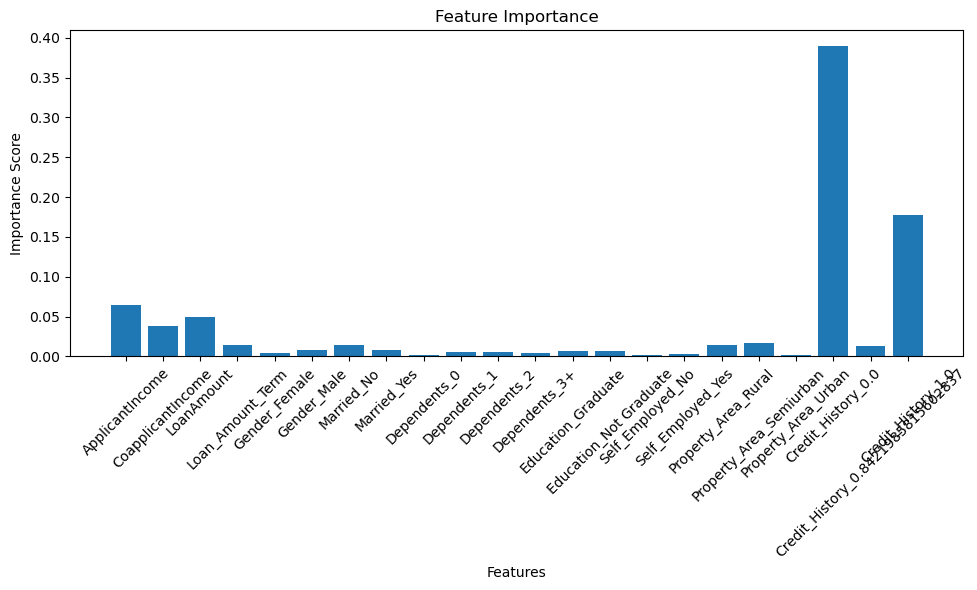

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have feature importance values in a list or array called 'feature_names'
feature_importances = best_model.feature_importances_  # Replace with your feature importance data

# Optional: If you have feature names in a list or DataFrame column called 'feature_names'
feature_names = best_model.feature_names_in_

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Approach 2 (check for empty array - corrected):
if len(feature_names) == 0:  # Check if feature_names is empty using length
    # Handle the case where feature_names is empty (optional)
    pass
else:
    # Ensure feature_names has valid values (if applicable)
    feature_names = [name for name in feature_names if name]

# Create the bar chart using feature names (if valid) or numeric indices
plt.bar(feature_names if feature_names else range(len(feature_importances)), feature_importances)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Optional: Rotate feature names if there are many for better readability
plt.xticks(rotation=45 if feature_names and len(feature_names) > 10 else 0)

plt.tight_layout()
plt.show()


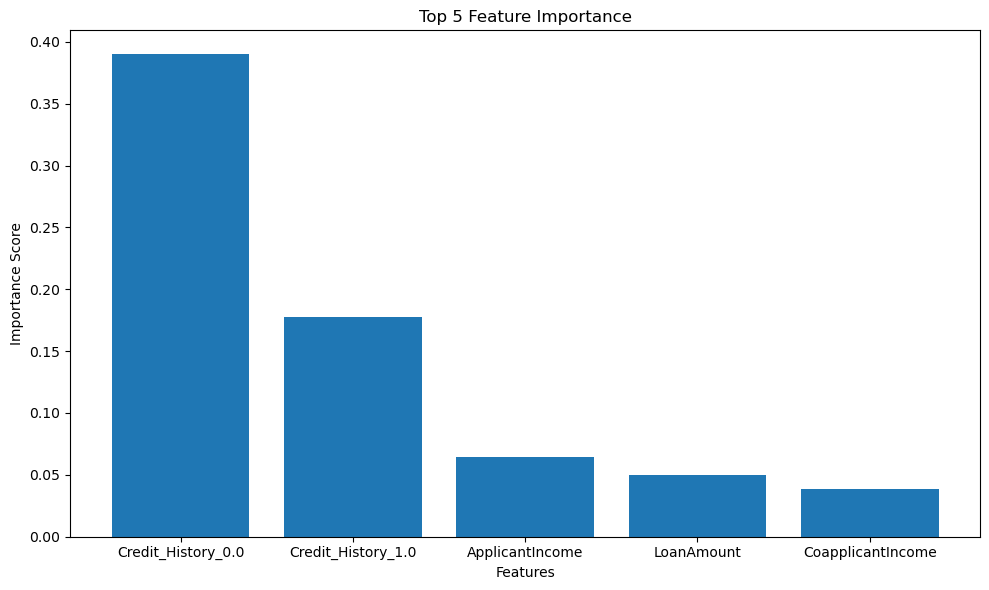

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have feature importance values in a list or array called 'feature_importances'
feature_importances = best_model.feature_importances_  # Replace with your feature importance data

# Optional: If you have feature names in a list or DataFrame column called 'feature_names'
feature_names = best_model.feature_names_in_

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Approach 2 (check for empty array - corrected):
if len(feature_names) == 0:
    # Handle the case where feature_names is empty (optional)
    pass
else:
    # Sort feature importance and names together (descending order)
    sorted_idx = feature_importances.argsort()[::-1]  # Get indices for descending sort
    feature_importances = feature_importances[sorted_idx]
    feature_names = [feature_names[i] for i in sorted_idx]

    # Select top features and importance scores
    top_features = feature_names[:8]  
    top_importance = feature_importances[:8]

# Create the bar chart using top features and importance
plt.bar(top_features, top_importance)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 5 Feature Importance')

# Optional: Rotate feature names if needed
plt.xticks(rotation=45 if top_features and len(top_features) > 10 else 0)

plt.tight_layout()
plt.show()


In [109]:
best_model.feature_importances_  # Replace with your feature importance data


array([0.05389116, 0.03697205, 0.04555679, 0.01204924, 0.00403609,
       0.00755303, 0.01389817, 0.00776563, 0.00219182, 0.00564877,
       0.00607563, 0.00398275, 0.00664005, 0.0072568 , 0.00211967,
       0.0034769 , 0.01497088, 0.01722255, 0.00199683, 0.3898096 ,
       0.01262964, 0.17739693, 0.06465842, 0.03837811, 0.04940238,
       0.01442011])

### **Feature Importances**

**Feature Importance Scores:**

- `credit_history_0.0`: 0.39 (High Importance)
- `credit_history_1.0`: 0.18 (Moderate Importance)
- `ApplicantIncome`: 0.065 (Low Importance)
- `LoanAmount`: 0.054 (Low Importance)
- `CoapplicantIncome`: 0.05 (Low Importance)

**Interpretation:**

Based on these scores, our model seems to be primarily focusing on the applicant's credit history as the key factor in predicting the target variable (likely loan approval or risk assessment).

- **Credit History:**
    - `credit_history_0.0` (presumably representing bad credit history) has a significantly higher importance (0.39) compared to `credit_history_1.0` (likely good credit history) with an importance of 0.18. This suggests that having a bad credit history has a much stronger negative impact on the prediction compared to having a good credit history.

- **Financial Factors:**
    - `ApplicantIncome` (0.065), `LoanAmount` (0.054), and `CoapplicantIncome` (0.05) all have relatively low importance scores. This indicates that while these factors might be considered by the model, they don't play as crucial a role as credit history in making predictions. 

**Possible Explanations:**

- The dataset might have a stronger correlation between bad credit history and the target variable compared to the other factors. 
- The model might be tuned to prioritize credit history as a reliable indicator for the target variable.



In [117]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_0.8421985815602837', 'Credit_History_1.0',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')